## Final Project Submission

Please fill out:
* Student name: Mohammed Siddiqui
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df_fin = pd.read_csv("tn.movie_budgets.csv")
df_title =pd.read_csv('title.basics.csv')
df_ratings =pd.read_csv('title.ratings.csv')
df_CPI =pd.read_csv('CPIAUCNS.csv')

In [3]:
df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])
df_CPI['Multiplier'] = df_CPI['CPIAUCNS'].iloc[-1] / df_CPI['CPIAUCNS']
df_CPI['DATE'] = df_CPI['DATE'].apply(lambda x: x.strftime('%Y-%m'))

In [4]:
df_CPI

,DATE,CPIAUCNS,Multiplier
0,1990-01,127.400,2.044537
1,1990-02,128.000,2.034953
2,1990-03,128.700,2.023885
3,1990-04,128.900,2.020745
4,1990-05,129.200,2.016053
...,...,...,...
367,2020-08,259.918,1.002139
368,2020-09,260.280,1.000745
369,2020-10,260.388,1.000330
370,2020-11,260.229,1.000941


In [5]:
def dollar_to_int(column):
    df_fin[column] = df_fin[column].str.replace(',', '')
    df_fin[column] = df_fin[column].str.replace('$', '')
    df_fin[column] = df_fin[column].astype(np.int64)
    return df_fin

In [6]:
dollar_to_int('domestic_gross')
dollar_to_int('production_budget')
dollar_to_int('worldwide_gross')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [7]:
df_fin['formatted_date'] = pd.to_datetime(df_fin['release_date'], format='%b %d, %Y')
df_fin['year_month'] = df_fin['formatted_date'].apply(lambda x: x.strftime('%Y-%m'))
df_fin['year'] = df_fin['formatted_date'].apply(lambda x: x.strftime('%Y'))
df_fin['month'] = df_fin['formatted_date'].apply(lambda x: x.strftime('%m'))
df_fin['movie'] = df_fin['movie'].astype(str)
df_fin['year'] = df_fin['year'].astype(np.int64)
df_fin['month'] = df_fin['month'].astype(np.int64)


In [8]:
df_fin = pd.merge(df_fin, df_CPI,left_on='year_month', right_on='DATE', how='left')

In [9]:
df_fin['budget_adj'] = df_fin['production_budget'] * df_fin['Multiplier']
df_fin['domestic_adj'] =df_fin['domestic_gross'] * df_fin['Multiplier']
df_fin['worldwide_adj'] =df_fin['worldwide_gross'] * df_fin['Multiplier']
df_fin['foreign_adj'] = df_fin['worldwide_adj'] - df_fin['domestic_adj']

In [10]:
df_fin= df_fin[df_fin['domestic_adj'] != 0]
df_fin= df_fin[df_fin['worldwide_adj'] != 0]
df_fin= df_fin[df_fin['budget_adj'] >= 15000000]
df_fin= df_fin[df_fin['year'] >= 2009]
df_fin= df_fin[df_fin['year'] < 2019]

In [11]:
df_fin['ROI'] =(((df_fin['domestic_adj']*0.5 +df_fin['foreign_adj']*0.3)-df_fin['budget_adj'])/df_fin['budget_adj'])*100
df_fin['profit'] =((df_fin['domestic_adj']*0.5 +df_fin['foreign_adj']*0.3)-df_fin['budget_adj'])

In [12]:
df_fin.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,formatted_date,year_month,year,month,DATE,CPIAUCNS,Multiplier,budget_adj,domestic_adj,worldwide_adj,foreign_adj,ROI,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009-12-18,2009-12,2009,12,2009-12,215.949,1.206183,5.126278e+08,9.173113e+08,3.348780e+09,2.431469e+09,131.765908,6.754686e+08
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20,2011-05,2011,5,2011-05,225.964,1.152723,4.733082e+08,2.778800e+08,1.205361e+09,9.274813e+08,-11.857784,-5.612387e+07
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01,2015-05,2015,5,2015-05,237.805,1.095326,3.621148e+08,5.027611e+08,1.536758e+09,1.033997e+09,55.083292,1.994647e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,2017-12,2017,12,2017-12,246.524,1.056587,3.349380e+08,6.552755e+08,1.391231e+09,7.359553e+08,63.739054,2.134863e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015-12-18,2015-12,2015,12,2015-12,236.525,1.101254,3.369836e+08,1.031503e+09,2.261216e+09,1.229714e+09,162.524775,5.476818e+08


In [13]:
#df_fin =df_fin.drop(['id', 'production_budget', 'domestic_gross', 'worldwide_gross' 'release_date', 'DATE', 'formatted_date'], axis=1)
df_fin =df_fin[['movie', 'year', 'month', 'budget_adj', 'domestic_adj', 'foreign_adj', 'worldwide_adj', 'ROI', 'profit']]

In [14]:
df_fin.head()

,movie,year,month,budget_adj,domestic_adj,foreign_adj,worldwide_adj,ROI,profit
0,Avatar,2009,12,5.126278e+08,9.173113e+08,2.431469e+09,3.348780e+09,131.765908,6.754686e+08
1,Pirates of the Caribbean: On Stranger Tides,2011,5,4.733082e+08,2.778800e+08,9.274813e+08,1.205361e+09,-11.857784,-5.612387e+07
3,Avengers: Age of Ultron,2015,5,3.621148e+08,5.027611e+08,1.033997e+09,1.536758e+09,55.083292,1.994647e+08
4,Star Wars Ep. VIII: The Last Jedi,2017,12,3.349380e+08,6.552755e+08,7.359553e+08,1.391231e+09,63.739054,2.134863e+08
5,Star Wars Ep. VII: The Force Awakens,2015,12,3.369836e+08,1.031503e+09,1.229714e+09,2.261216e+09,162.524775,5.476818e+08


In [15]:
df_ratings =df_ratings[df_ratings['numvotes'] > 1000]

In [16]:
df_title.set_index("tconst", inplace=True)
df_ratings.set_index("tconst", inplace=True)

In [17]:
df_imdb = pd.merge(df_title, df_ratings,left_index=True, right_index=True, how='inner')
df_imdb['genres'][df_imdb['genres'].isnull()] = 'Unavailable'

In [18]:
df_all = pd.merge(df_imdb, df_fin,left_on='primary_title', right_on='movie', how='inner')
df_all.drop(['original_title', 'averagerating', 'numvotes', 'start_year'], axis=1, inplace= True)

In [19]:
triplet_genre = df_all.genres.str.split(",", expand=True)
df_all['genre_1']=triplet_genre[0]
df_all['genre_2']=triplet_genre[1]
df_all['genre_3']=triplet_genre[2]


In [20]:
df_genres = df_all[[ 'genres', 'primary_title', 'profit']].copy() 

In [21]:
df_genres.head()

,genres,primary_title,profit
0,"Adventure,Drama,Romance",On the Road,-2.468730e+07
1,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,-2.570022e+07
2,"Action,Crime,Drama",A Walk Among the Tombstones,-4.556483e+06
3,"Action,Adventure,Sci-Fi",Jurassic World,4.476368e+08
4,"Comedy,Drama",The Rum Diary,-4.131606e+07


In [22]:
gen_1 =pd.Series(df_all['ROI'].values, df_all['genre_1'])
gen_2 =pd.Series(df_all['ROI'].values, df_all['genre_2'])
gen_3 =pd.Series(df_all['ROI'].values, df_all['genre_3'])
df_gp =pd.DataFrame(pd.concat([gen_1, gen_2, gen_3]))

df_gp.reset_index(inplace=True)
df_gp = df_gp.rename(columns = {'index':'Genre', 0:"ROI"})

common_genres =df_gp['Genre'].value_counts()[:10].index.tolist()
type(common_genres)

list

In [23]:

common_genres =df_gp['Genre'].value_counts()[:10].index.tolist()


<AxesSubplot:xlabel='Genre', ylabel='ROI'>

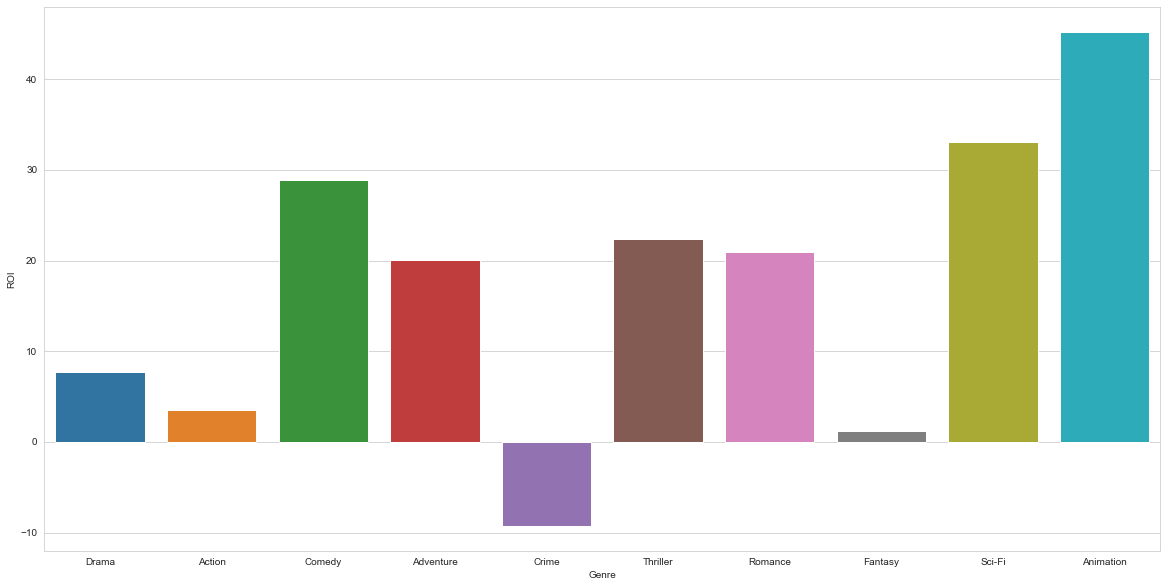

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_gp, x='Genre', y='ROI', order=common_genres, ci=None)

<AxesSubplot:xlabel='month', ylabel='ROI'>

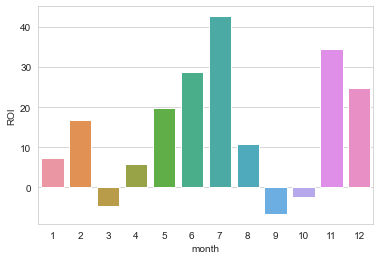

In [25]:
sns.barplot(data=df_fin, x='month', y='ROI', ci=None)

<AxesSubplot:xlabel='month', ylabel='budget_adj'>

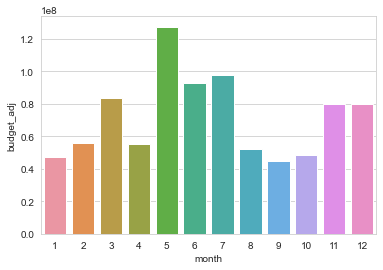

In [26]:
sns.barplot(data=df_fin, x='month', y='budget_adj', ci=None)

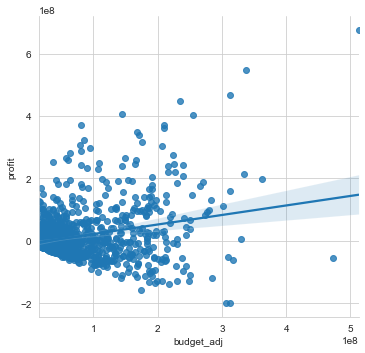

In [34]:
sns.lmplot(data=df_fin, x='budget_adj', y='profit')

<AxesSubplot:xlabel='budget_adj', ylabel='Count'>

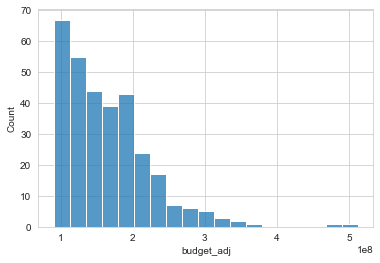

In [46]:
sns.histplot(data=df_fin[df_fin['budget_adj'] > 90000000], x='budget_adj')